<a href="https://colab.research.google.com/github/kawshiksharma/Group-17---Research-Methods-In-Data-Science/blob/main/Code_Group_17%20new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

In [2]:
# import train data

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
data_train = pd.read_csv(file_name)
data_train.head()

Saving Regression with a Tabular Paris Housing Price DatasetLinks to an external site. train.csv to Regression with a Tabular Paris Housing Price DatasetLinks to an external site. train.csv


,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8


In [3]:
# import test data

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
data_test = pd.read_csv(file_name)
data_test.head()

Saving Regression with a Tabular Paris Housing Price DatasetLinks to an external site. test.csv to Regression with a Tabular Paris Housing Price DatasetLinks to an external site. test.csv


,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,22730,47580,89,0,1,8,54830,5,3,1995,0,0,6885,8181,241,0,8
1,22731,62083,38,0,0,87,8576,10,3,1994,1,1,4601,9237,393,1,4
2,22732,90499,75,1,1,37,62454,9,6,1997,0,1,7454,2680,305,0,2
3,22733,16354,47,1,1,9,9262,6,5,2019,1,1,705,5097,122,1,5
4,22734,67510,8,0,0,55,24112,3,7,2014,1,1,3715,7979,401,1,9


In [4]:
data_train.isna().sum()

id                   0
squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [5]:
data_test.isna().sum()

id                   0
squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
dtype: int64

In [6]:
data_train.describe()

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,22730.000000,2.273000e+04,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,2.273000e+04
mean,11364.500000,4.658622e+04,48.241091,0.475891,0.452750,47.305983,50013.795996,5.585042,5.620766,2008.005059,0.467972,0.460009,5283.646634,5067.981698,530.469644,0.461681,5.153058,4.634457e+06
std,6561.730145,4.952124e+04,28.226428,0.499429,0.497773,47.777207,30006.637729,2.739533,2.713026,118.826777,0.498984,0.498409,3047.084412,3097.347939,274.840604,0.498540,3.055246,2.925163e+06
min,0.000000,8.900000e+01,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.000000,0.000000,0.000000,4.000000,1.000000,4.000000,0.000000,0.000000,1.031350e+04
25%,5682.250000,2.039275e+04,25.000000,0.000000,0.000000,25.000000,22936.000000,3.000000,3.000000,2000.000000,0.000000,0.000000,2977.250000,2599.000000,297.000000,0.000000,3.000000,2.041739e+06
50%,11364.500000,4.448400e+04,47.000000,0.000000,0.000000,45.000000,50414.000000,6.000000,6.000000,2006.000000,0.000000,0.000000,5359.000000,4977.000000,515.000000,0.000000,5.000000,4.450823e+06
75%,17046.750000,7.154700e+04,75.000000,1.000000,1.000000,69.000000,76291.000000,8.000000,8.000000,2014.000000,1.000000,1.000000,7746.000000,7652.000000,767.000000,1.000000,8.000000,7.159920e+06
max,22729.000000,6.071330e+06,100.000000,1.000000,1.000000,6000.000000,491100.000000,10.000000,10.000000,10000.000000,1.000000,1.000000,91992.000000,96381.000000,9017.000000,1.000000,10.000000,1.000428e+07


In [7]:
# Exploratory Data Analysis (EDA)

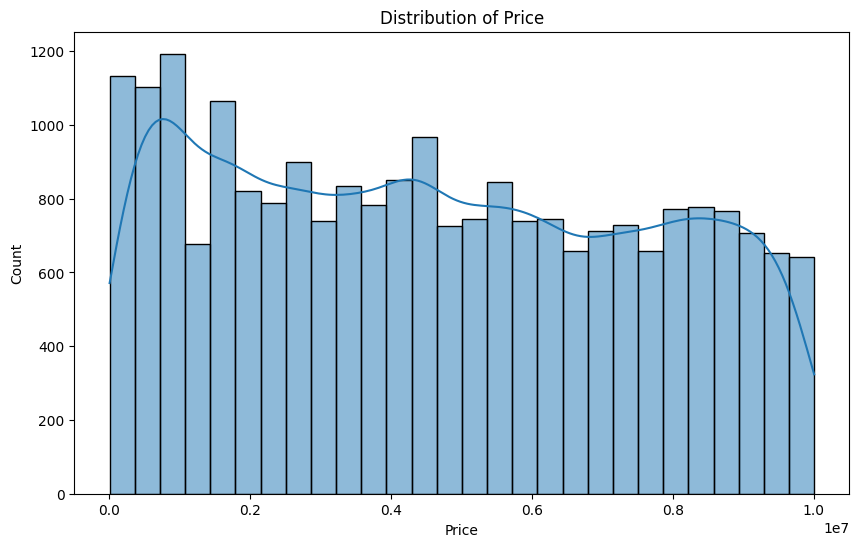

In [8]:
# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data=data_train, x='price', kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

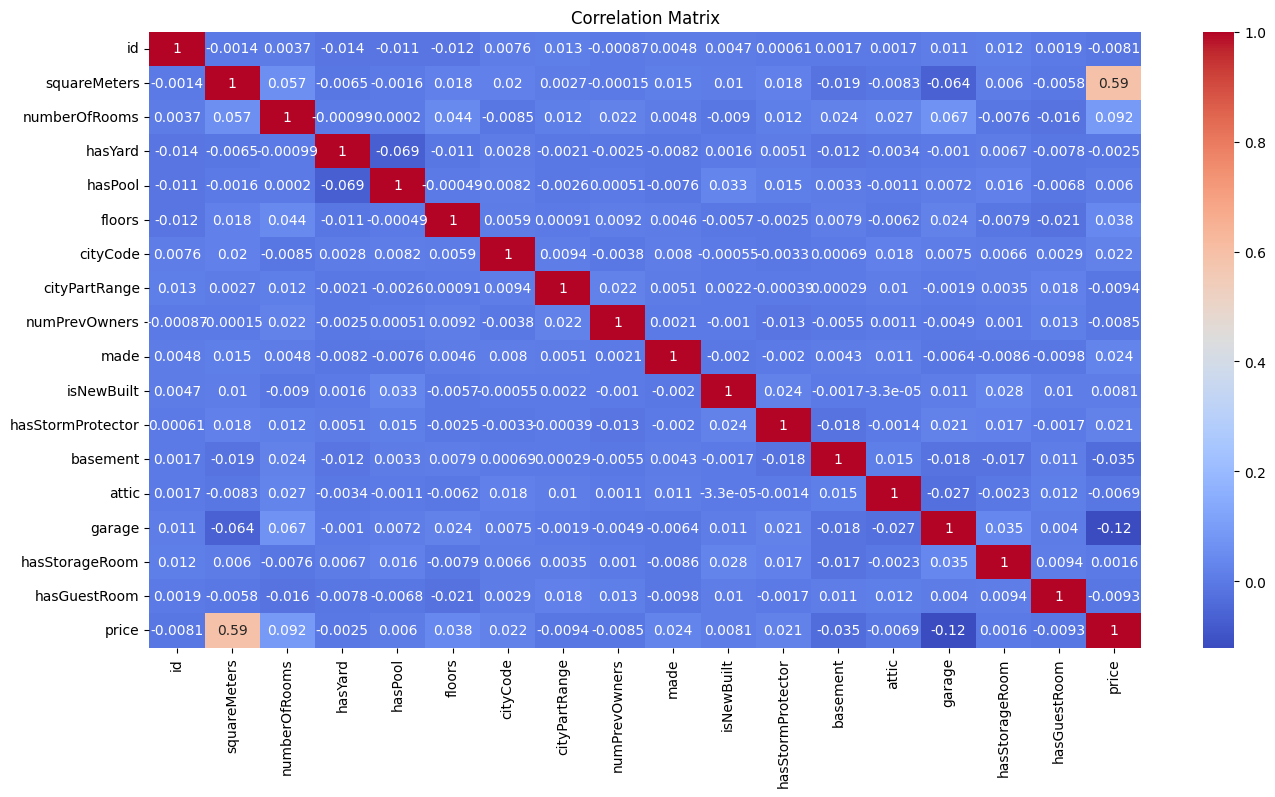

In [9]:
# Correlation matrix
corr_matrix = data_train.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Data Pre-processing

In [11]:
# Drop irrelevant columns and separate the target variable
X = data_train.drop('price', axis=1)
y = data_train['price']

In [12]:
# Model Training and Evaluation

In [13]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Perform data pre-processing (e.g., handling missing values, encoding categorical variables, scaling features)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [15]:
# Train and evaluate the model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [16]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_predictions = lr.predict(X_val_scaled)
lr_rmse = mean_squared_error(y_val, lr_predictions, squared=False)

In [17]:
# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(X_train_scaled, y_train)
dt_predictions = dt.predict(X_val_scaled)
dt_rmse = mean_squared_error(y_val, dt_predictions, squared=False)

In [18]:
# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
rf_predictions = rf.predict(X_val_scaled)
rf_rmse = mean_squared_error(y_val, rf_predictions, squared=False)

In [19]:
# Compare the performance of different models
print("Linear Regression RMSE:", lr_rmse)
print("Decision Tree RMSE:", dt_rmse)
print("Random Forest RMSE:", rf_rmse)

Linear Regression RMSE: 2046793.8044225147
Decision Tree RMSE: 239075.5629958818
Random Forest RMSE: 216392.514511556


In [20]:
# Customize the Chosen Models

In [59]:
# Customization for Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_predictions = lr.predict(X_val_scaled)
lr_rmse = mean_squared_error(y_val, lr_predictions, squared=False)

In [22]:
# Customization for Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train_scaled, y_train)
dt_predictions = dt.predict(X_val_scaled)
dt_rmse = mean_squared_error(y_val, dt_predictions, squared=False)

In [23]:
# Customization for Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_scaled, y_train)
rf_predictions = rf.predict(X_val_scaled)
rf_rmse = mean_squared_error(y_val, rf_predictions, squared=False)

In [67]:
plt.figure(figsize=(16, 6))

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

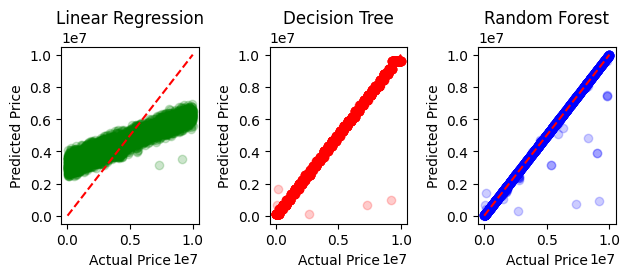

In [74]:
# Predictions vs Actual
#Linear Regression
plt.subplot(2, 3, 1)
plt.scatter(y_val, lr_predictions, color='green', alpha=0.2)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red')
plt.title('Linear Regression')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Decision Tree Regressor
plt.subplot(2, 3, 2)
plt.scatter(y_val, dt_predictions, color='red', alpha=0.2)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red')
plt.title('Decision Tree')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Random Forest Regressor
plt.subplot(2, 3, 3)
plt.scatter(y_val, rf_predictions, color='blue', alpha=0.2)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red')
plt.title('Random Forest')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.tight_layout()
plt.show()

In [41]:
# Compare the performance of different models after customization
print("Linear Regression RMSE:", lr_rmse)
print("Decision Tree RMSE:", dt_rmse)
print("Random Forest RMSE:", rf_rmse)

Linear Regression RMSE: 2046793.8044225147
Decision Tree RMSE: 192420.26273423273
Random Forest RMSE: 216208.4747921081


In [52]:
# Prepare the Kaggle submission file
submission = pd.DataFrame({'Id': data_test['id'], 'price': dt_rmse})
submission.head()

,Id,price
0,22730,192420.262734
1,22731,192420.262734
2,22732,192420.262734
3,22733,192420.262734
4,22734,192420.262734


In [53]:
submission.to_csv('submission_RF_python.csv', index=False)

In [54]:
from google.colab import files
files.download("submission_RF_python.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>